1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def prob(tau):
    return np.log(2)/tau

def p2(t, tau):
    return 2**(-t/tau) * np.log(2)/tau

def inverse_coumulative_normed_p2(z, tau ,tmax):
    return tau * np.log2(z*(1-2**(-tmax/tau)))

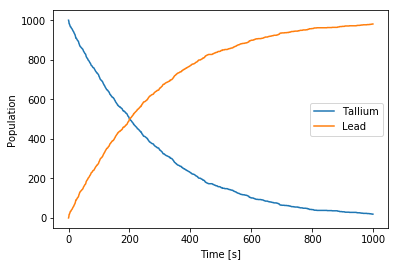

In [4]:
n_tallium = 1000
n_lead = 0
half_life = 3.052*60 #in secondi
time_max = 1000

tallium_evol = np.zeros(time_max)
lead_evol = np.zeros(time_max)

for i in range(time_max):
    
    decayed_atoms = 0
    tallium_evol[i] = n_tallium
    lead_evol[i] = n_lead
    
    for k in range(n_tallium):
        sample = np.random.random()
        if sample < prob(half_life):
            decayed_atoms += 1
            
    n_tallium -= decayed_atoms
    n_lead += decayed_atoms
    
plt.plot(tallium_evol, label='Tallium')
plt.plot(lead_evol, label='Lead')
plt.xlabel('Time [s]')
plt.ylabel('Population')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log2
  # This is added back by InteractiveShellApp.init_path()


"\nfor i in range(time_max):\n    \n    decayed_atoms = 0\n    tallium_evol[i] = n_tallium\n    lead_evol[i] = n_lead\n    \n    for k in range(n_tallium):\n        sample = np.random.random()\n        if sample < prob(half_life):\n            decayed_atoms += 1\n            \n    n_tallium -= decayed_atoms\n    n_lead += decayed_atoms\n    \nplt.plot(tallium_evol, label='Tallium')\nplt.plot(lead_evol, label='Lead')\nplt.xlabel('Time [s]')\nplt.ylabel('Population')\nplt.legend()\nplt.show()\n"

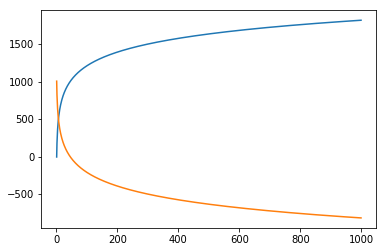

In [15]:
tallium_evol = np.zeros(time_max)
lead_evol = np.zeros(time_max)

sample_points = inverse_coumulative_normed_p2( np.linspace(0,time_max,1000), half_life, time_max )
plt.plot(sample_points)
plt.plot(1000- sample_points)
"""
for i in range(time_max):
    
    decayed_atoms = 0
    tallium_evol[i] = n_tallium
    lead_evol[i] = n_lead
    
    for k in range(n_tallium):
        sample = np.random.random()
        if sample < prob(half_life):
            decayed_atoms += 1
            
    n_tallium -= decayed_atoms
    n_lead += decayed_atoms
    
plt.plot(tallium_evol, label='Tallium')
plt.plot(lead_evol, label='Lead')
plt.xlabel('Time [s]')
plt.ylabel('Population')
plt.legend()
plt.show()
"""


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [3]:
def scatter_angle(b, Z=79, E=7700000): #E in MeV
    e = 1.6 * 10**(-19) #C
    eps = 8.854 * 10**(-12) #F/m
    return 2 * np.arctan((Z*e) / (2*np.pi*eps*E*b))

In [4]:
N = 1000000
r_bohr = 5.292*10**(-11) #m
sigma = r_bohr/100

x = np.random.normal(0,sigma,N)
y = np.random.normal(0,sigma,N)
theta = scatter_angle(np.sqrt(x**2+y**2))
print('Number of particles that "bounce back": ',theta[theta>np.pi/2].shape[0])


Number of particles that "bounce back":  1551


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

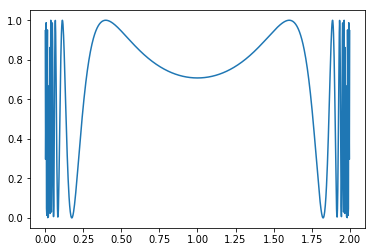

In [5]:
def f(x):
    return np.sin(1/(x*(2-x)))**2

x_val = np.linspace(0.00001,1.99999,1000)
y_val= f(x_val)

plt.plot(x_val,y_val)
plt.show()

In [6]:
# HIT or MISS

box_area = (x_val.max()-x_val.min())*(y_val.max()-y_val.min())
sample_points = np.random.rand(1000000,2)*(2,1)
good_points = sample_points[ sample_points[:,1] < f(sample_points[:,0]) ]
integral = len(good_points)/len(sample_points) * box_area
print('Integral of f(x) in [0,2] with Hit/Miss method: ', integral)

Integral of f(x) in [0,2] with Hit/Miss method:  1.4530239852297149


In [7]:
# MEAN VALUE

sample_points = np.random.rand(1000000)
average = np.average( f(sample_points) )
integral = (x_val.max()-x_val.min()) * average
err_integral = (x_val.max()-x_val.min()) * np.sqrt(f(sample_points))
print('Integral of f(x) in [0,2] with Mean Value method: ', integral)

Integral of f(x) in [0,2] with Mean Value method:  1.4517788552021391


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [8]:
n_dimensions = 10
N = 10000000

box_volume = 2**n_dimensions
sample_points = (np.random.rand(N, n_dimensions)-0.5) * 2
good_points = sample_points[ np.sum(sample_points**2,axis=1) < 1 ]
integral = len(good_points)/len(sample_points) * box_volume
print('Volume of '+str(n_dimensions)+'D sphere of unit radius: ', integral)

Volume of 10D sphere of unit radius:  2.5309184


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [26]:
def f(x):
    return 1/(np.sqrt(x)*(np.exp(x)+1))

def w(x):
    return 1/np.sqrt(x)

def inverse_coumulative_normed_w(z):
    return (z)**2

In [32]:
N = 1000000
x_val = np.linspace(0.000001,1,N)

# Sampling points from w using inverse transform method
sample_points = inverse_coumulative_normed_w( np.random.rand(N) )

# Compute integral of w
w_mean = np.average( w(np.random.rand(N)) )
w_integral = (x_val.max()-x_val.min()) * w_mean

Integral = np.sum(f(sample_points)/w(sample_points) * w_integral) / N
print('Value of the integral:', Integral)

Value of the integral: 0.8369705006042291
